In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
folder_path = "names"
columns = ['name', 'gender', 'quantity']

files = os.listdir(folder_path)
dfs = {}

for file_name in files:
    file_path = os.path.join(folder_path, file_name)

    if os.path.isfile(file_path):
        df = pd.read_csv(file_path, names=columns) 
        name = file_name.replace('.txt', '').replace('yob', '')
        dfs[name] = df

dataframes = dfs

In [3]:
folder_path = 'namesbystate'
columns = ['state', 'gender', 'year', 'name', 'quantity']

files = os.listdir(folder_path)
state_df = pd.DataFrame()

for file_name in files:
    file_path = os.path.join(folder_path, file_name)

    if os.path.isfile(file_path) and file_path.endswith('.TXT'):
        df = pd.read_csv(file_path, names=columns) 
        name = file_name.split('.')[1]
        state_df = pd.concat([state_df, df])
        
state_df

,state,gender,year,name,quantity
0,ID,F,1910,Mary,53
1,ID,F,1910,Dorothy,31
2,ID,F,1910,Helen,30
3,ID,F,1910,Margaret,24
4,ID,F,1910,Ruth,24
...,...,...,...,...,...
49395,SD,M,2022,Tristan,5
49396,SD,M,2022,Tyson,5
49397,SD,M,2022,Warren,5
49398,SD,M,2022,Zayne,5


In [4]:
state_df['quantity'].sum()
#322.6 Million individuals (for state data)

322578957

In [5]:
total = 0
for dataframe in dataframes.values():
    total += dataframe['quantity'].sum()
total

#365.3 Million individuals total

365296191

In [6]:
# data is from 1880 - 2022

years = list(dataframes.keys())
years.sort()

In [7]:
statesList = list(set(state_df['state'].values))
statesList.sort()

In [8]:
male_dataframes = {}
female_dataframes = {}

for year, df in dataframes.items():
    male_dataframes[year] = df[df['gender'] == 'M']
    female_dataframes[year] = df[df['gender'] == 'F']

for year, df in male_dataframes.items():
    df.reset_index(drop=True, inplace=True)

In [9]:
# Top 10 most popular names each year by gender
top_10_names_male = {}
for year, df in male_dataframes.items():
    top_10_names_male[year] = df.nlargest(10, 'quantity')['name']
    
top_10_names_female = {}
for year, df in female_dataframes.items():
    top_10_names_female[year] = df.nlargest(10, 'quantity')['name']

In [10]:
# Top 100 most popular names each year by gender
top_100_names_male = {}
for year, df in male_dataframes.items():
    top_100_names_male[year] = df.nlargest(100, 'quantity')['name']
    
top_100_names_female = {}
for year, df in female_dataframes.items():
    top_100_names_female[year] = df.nlargest(100, 'quantity')['name']

In [11]:
# Top 1000 most popular names each year by gender
top_1000_names_male = {}
for year, df in male_dataframes.items():
    top_1000_names_male[year] = df.nlargest(1000, 'quantity')['name']
    
top_1000_names_female = {}
for year, df in female_dataframes.items():
    top_1000_names_female[year] = df.nlargest(1000, 'quantity')['name']
    

In [12]:
# 4. Name popularity over time
names_to_plot = ['Olivia', 'Ruth']  # Example names

def plot_names(names_to_plot):
    for name in names_to_plot:
        popularity = {year: dataframes[year][dataframes[year]['name'] == name]['quantity'].sum() for year in years}
        plt.plot(list(popularity.keys()), list(popularity.values()), label=name)
        print(f'Total occurrences of {name}: ', sum(popularity.values()))
    plt.xlabel('Year')
    plt.ylabel('Quantity')
    plt.xticks(np.arange(0, 150, 10),np.arange(1880, 2021, 10), rotation = 45)

    plt.title('Name Popularity Over Time (Quantity)')
    plt.legend()
    plt.show()


In [13]:
def plot_by_rank_f(names_to_plot):
    for name in names_to_plot:
        popularity = {}
        for year in years:
            if name in female_dataframes[year].values:
                popularity[year] =  1000 - female_dataframes[year][female_dataframes[year]['name'] == name].index
        plt.plot(list(popularity.keys()), list(popularity.values()), label=name)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.xticks(np.arange(0, 150, 10),np.arange(1880, 2021, 10), rotation = 45)
    plt.yticks(np.arange(0, 1001, 100), np.arange(1000, -1, -100))

    plt.title('Name Popularity Over Time (Rank)')
    plt.legend()
    plt.show()

In [14]:
def plot_by_rank_m(names_to_plot):
    for name in names_to_plot:
        popularity = {year: 1000 - male_dataframes[year][male_dataframes[year]['name'] == name].index for year in years}
        plt.plot(list(popularity.keys()), list(popularity.values()), label=name)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.xticks(np.arange(0, 150, 10),np.arange(1880, 2021, 10), rotation = 45)
    plt.yticks(np.arange(0, 1001, 100), np.arange(1000, -1, -100))

    plt.title('Name Popularity Over Time (Rank)')
    plt.legend()
    plt.show()

In [15]:
# current rank and top rank

def analyze_rank_m(name):
    bestYear = 0
    highRank = -1
    rank = 0
    for year in male_dataframes:
        rank = male_dataframes[year][male_dataframes[year]['name'] == name].index + 1
        if len(rank) > 0:
            rank = rank[0] + 1
            if highRank == -1 or rank < highRank:
                bestYear = year
                highRank = rank
    print(f'Current rank for {name} is {rank} and highest is {highRank} in {bestYear}')   
    
    
def analyze_rank_f(name):
    bestYear = 0
    highRank = -1
    rank = 0
    for year in female_dataframes:
        rank = female_dataframes[year][female_dataframes[year]['name'] == name].index
        if len(rank) > 0:
            rank = rank[0] + 1
            if highRank == -1 or rank < highRank:
                bestYear = year
                highRank = rank
    print(f'Current rank for {name} is {rank} and highest is {highRank} in {bestYear}')     

Total occurrences of Olivia:  524150
Total occurrences of Ruth:  833660


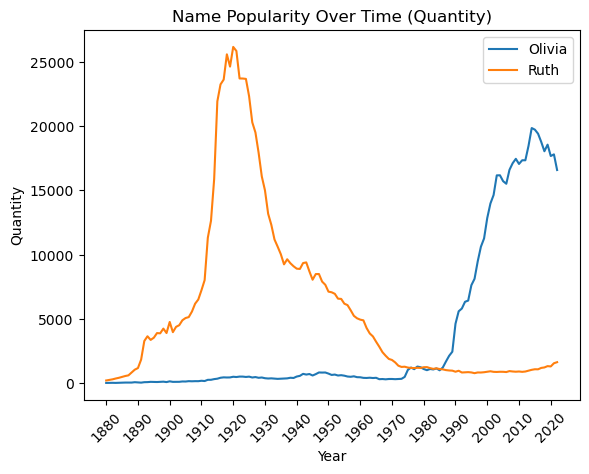

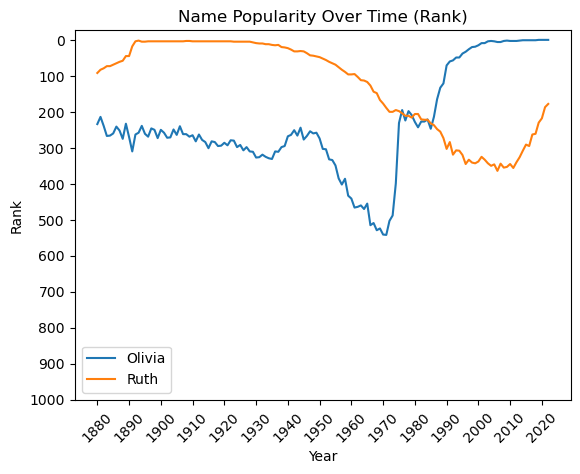

In [16]:
plot_names(names_to_plot)
plot_by_rank_f(names_to_plot)

In [17]:
dataframes['1910'][dataframes['1910']['name'] == 'Mary']['quantity']

0       22848
3027       99
Name: quantity, dtype: int64

In [18]:
state_df[(state_df['name'] == 'Mary') & (state_df['year'] == 1910) & (state_df['gender'] == 'F')]['quantity'].sum()

22848

In [19]:
# gender comparisons of unisex names
state_df[(state_df['name'] == 'Casey') & (state_df['gender'] == 'F')]['quantity'].sum()

75075

In [20]:
state_df[(state_df['name'] == 'Casey') & (state_df['gender'] == 'M')]['quantity'].sum()

110289

In [21]:
# plot all top 10 names against each other
top_tens_m = []
for year in years:
    top_tens_m += list(top_10_names_male[year].values)
top_tens_m = list(set(top_tens_m))

top_tens_f = []
for year in years:
    top_tens_f += list(top_10_names_female[year].values)
top_tens_f = list(set(top_tens_f))


In [22]:
top_tens_m_df = pd.DataFrame(columns = ['name', 'occurrences'])
for name in top_tens_m:
        popularity = {year: dataframes[year][dataframes[year]['name'] == name]['quantity'].sum() for year in years}
        top_tens_m_df.loc[len(top_tens_m_df.index)] = [name, sum(popularity.values())]
top_tens_m_df = top_tens_m_df.sort_values(by='occurrences', ascending=False, ignore_index=True)
top_tens_m_df = top_tens_m_df.head(10)

In [23]:
top_tens_f_df = pd.DataFrame(columns = ['name', 'occurrences'])
for name in top_tens_f:
        popularity = {year: dataframes[year][dataframes[year]['name'] == name]['quantity'].sum() for year in years}
        top_tens_f_df.loc[len(top_tens_f_df.index)] = [name, sum(popularity.values())]
top_tens_f_df = top_tens_f_df.sort_values(by='occurrences', ascending=False, ignore_index=True)
top_tens_f_df = top_tens_f_df.head(10)

Total occurrences of James:  5238523
Total occurrences of John:  5180158
Total occurrences of Robert:  4858239
Total occurrences of Michael:  4423430
Total occurrences of William:  4183494
Total occurrences of David:  3667664
Total occurrences of Joseph:  2657975
Total occurrences of Richard:  2582274
Total occurrences of Charles:  2430018
Total occurrences of Thomas:  2346804


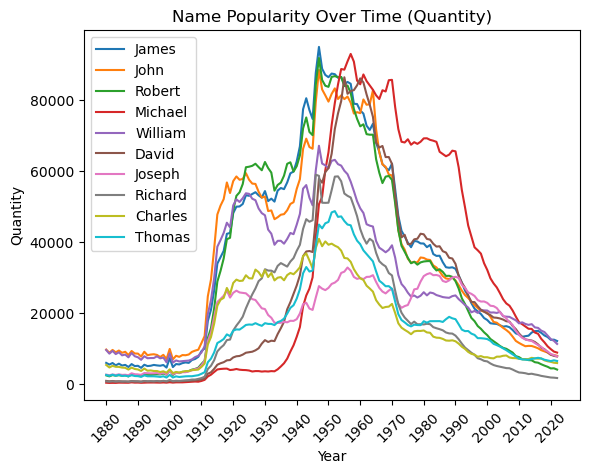

Total occurrences of Mary:  4149886
Total occurrences of Elizabeth:  1673343
Total occurrences of Patricia:  1577987
Total occurrences of Jennifer:  1474849
Total occurrences of Linda:  1457877
Total occurrences of Barbara:  1439827
Total occurrences of Margaret:  1261621
Total occurrences of Susan:  1125295
Total occurrences of Dorothy:  1113758
Total occurrences of Sarah:  1093438


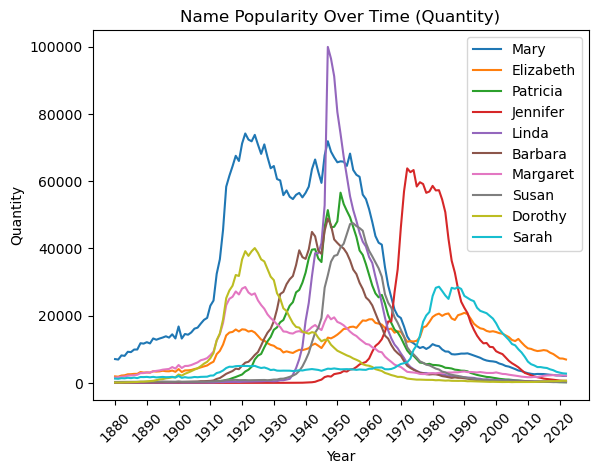

In [24]:
plot_names(list(top_tens_m_df['name'].values))
plot_names(list(top_tens_f_df['name'].values))

Current rank for James is 7 and highest is 2 in 1949
Current rank for John is 29 and highest is 2 in 1910
Current rank for Robert is 77 and highest is 2 in 1938
Current rank for Michael is 15 and highest is 2 in 1973
Current rank for William is 5 and highest is 3 in 1904
Current rank for David is 28 and highest is 2 in 1960
Current rank for Joseph is 25 and highest is 6 in 1913
Current rank for Richard is 198 and highest is 6 in 1938
Current rank for Charles is 53 and highest is 5 in 1880
Current rank for Thomas is 48 and highest is 9 in 1949


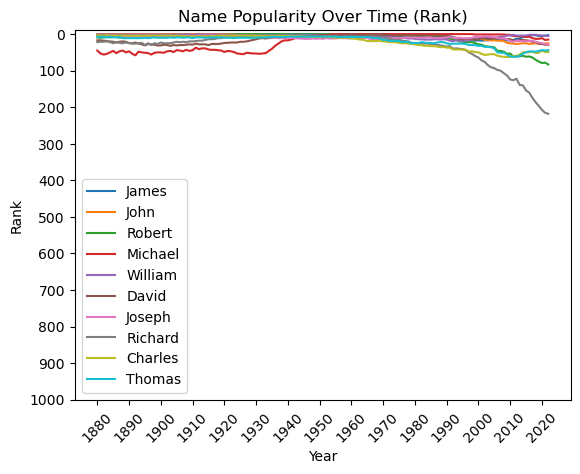


Current rank for Mary is 126 and highest is 1 in 1938
Current rank for Elizabeth is 14 and highest is 3 in 1889
Current rank for Patricia is 940 and highest is 3 in 1938
Current rank for Jennifer is 391 and highest is 1 in 1973
Current rank for Linda is 771 and highest is 1 in 1949
Current rank for Barbara is 931 and highest is 2 in 1938
Current rank for Margaret is 127 and highest is 3 in 1910
Current rank for Susan is 1050 and highest is 2 in 1958
Current rank for Dorothy is 561 and highest is 2 in 1925
Current rank for Sarah is 81 and highest is 3 in 1993


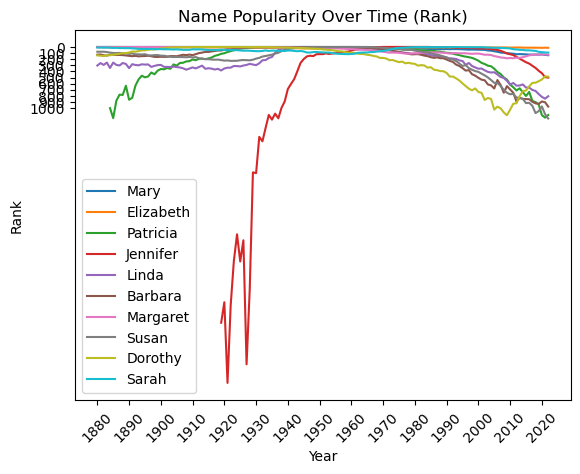

In [42]:
for name in list(top_tens_m_df['name'].values):
    analyze_rank_m(name)
plot_by_rank_m(list(top_tens_m_df['name'].values))    
 
print()

for name in list(top_tens_f_df['name'].values):
    analyze_rank_f(name)
plot_by_rank_f(list(top_tens_f_df['name'].values)) 

In [26]:
classNames = ['Jack',
 'Akhila',
 'Errick/Erik/Eric/Erick',
 'Noah',
 'Santosh',
 'Valli',
 'Michael/Mike',
 'Braden/Brayden',
 'Ethan',
 'Caleb/Kaleb',
 'Wesley',
 'Satchel',
 'Elise',
 'Ryan',
 'Jakob/Jacob',
 'Jensen',
 'Gavin',
 'Jayden/Jaden',
 'Curtis/Kurtis',
 'Paige',
 'Beau/Beaux',
 'Abdullah',
 'Kevin',
 'Sayali',
 'Paul',
 'Nate/Nathan',
 'Kartik',
 'Sandeep',
 'Andrew/Drew',
 'Tanner']

In [27]:
classNames.sort()

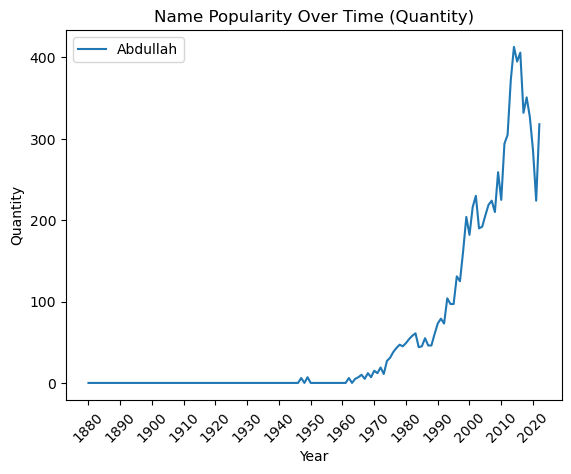

Total occurrences:  8392
Most popular year is 2014 with 413 occurrences
Current rank for Abdullah is 737 and highest is 636 in 2014
Current rank for Abdullah is Index([], dtype='int64') and highest is -1 in 0


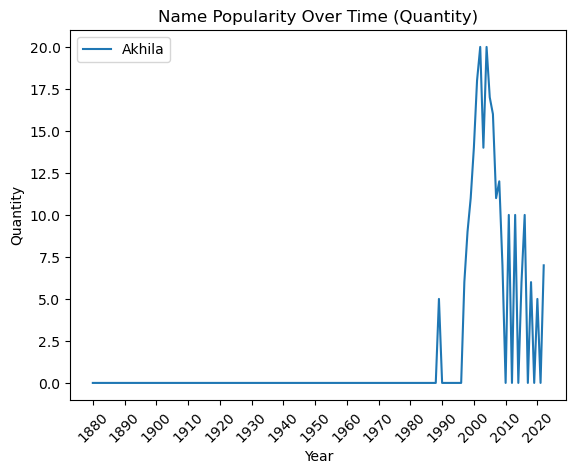

Total occurrences:  234
Most popular year is 2002 with 20 occurrences
Current rank for Akhila is Index([], dtype='int64') and highest is -1 in 0
Current rank for Akhila is Index([], dtype='int64') and highest is 5676 in 2002


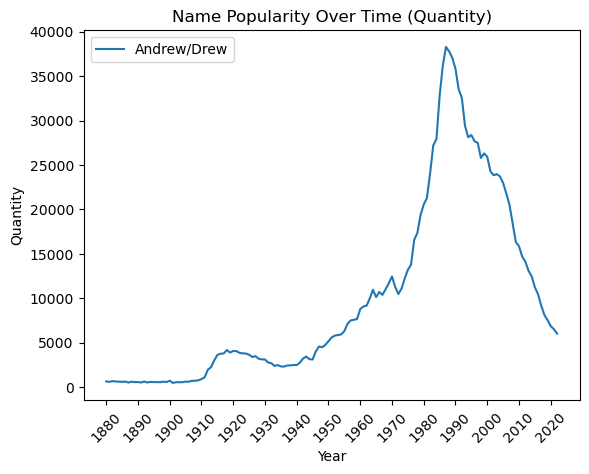

Total occurrences:  1405346
Most popular year is 1987 with 38289 occurrences
Current rank for Andrew is 47 and highest is 6 in 2003
Current rank for Andrew is 8629 and highest is 789 in 1987


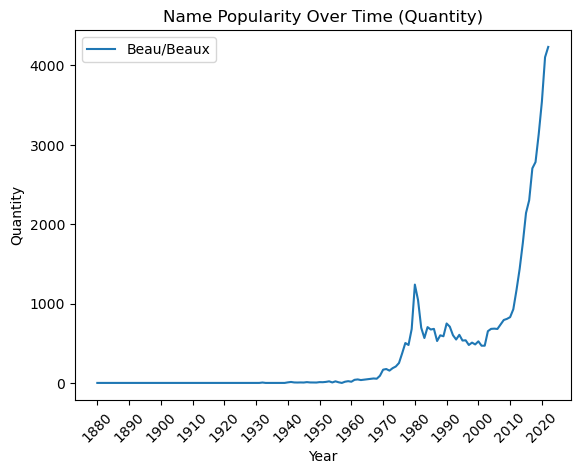

Total occurrences:  54481
Most popular year is 2022 with 4234 occurrences
Current rank for Beau is 133 and highest is 90 in 2022
Current rank for Beau is 3393 and highest is 2888 in 2022


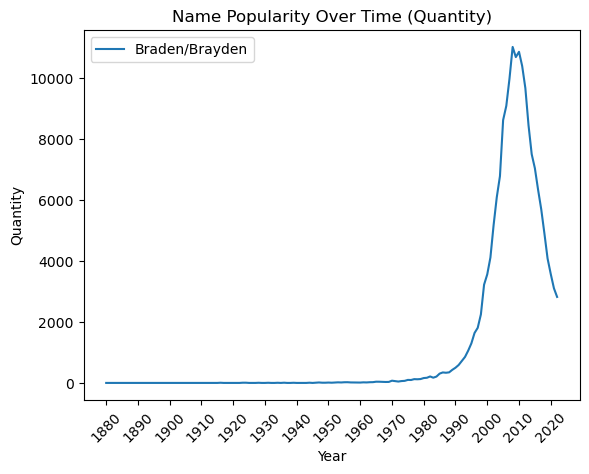

Total occurrences:  177703
Most popular year is 2008 with 11030 occurrences
Current rank for Braden is 672 and highest is 134 in 2005
Current rank for Braden is Index([], dtype='int64') and highest is 4921 in 2002


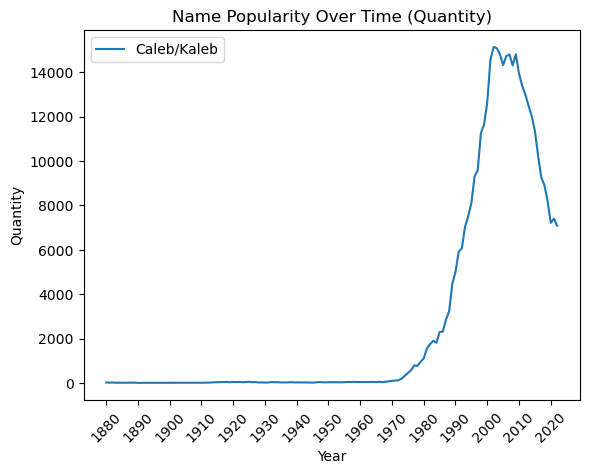

Total occurrences:  391453
Most popular year is 2002 with 15135 occurrences
Current rank for Caleb is 52 and highest is 32 in 2009
Current rank for Caleb is 8208 and highest is 2717 in 2004


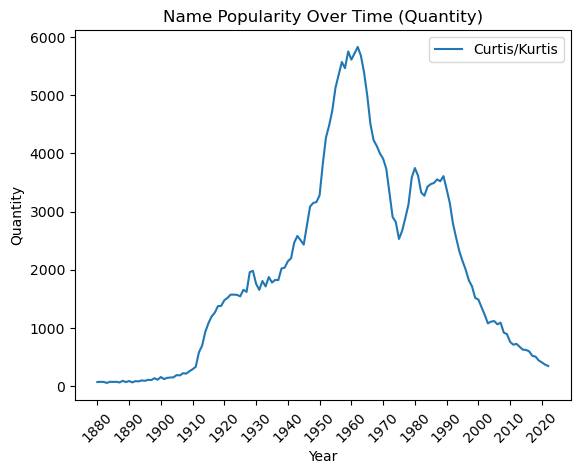

Total occurrences:  280157
Most popular year is 1962 with 5830 occurrences
Current rank for Curtis is 670 and highest is 73 in 1963
Current rank for Curtis is Index([], dtype='int64') and highest is 1084 in 1902


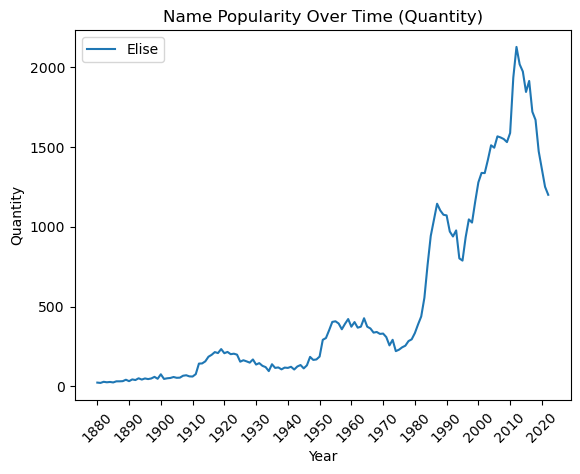

Total occurrences:  71457
Most popular year is 2012 with 2126 occurrences
Current rank for Elise is Index([], dtype='int64') and highest is 4142 in 1929
Current rank for Elise is 206 and highest is 151 in 2012


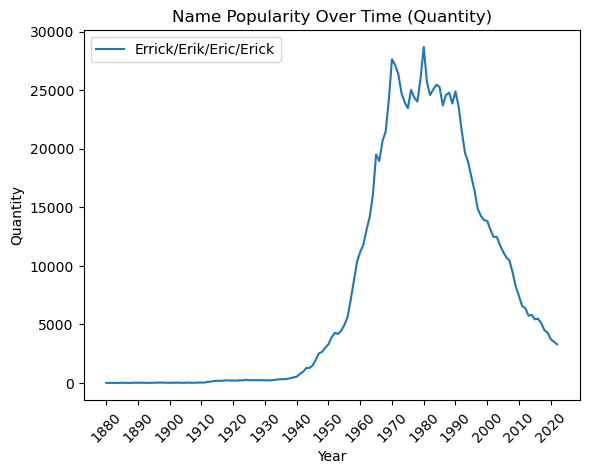

Total occurrences:  1123353
Most popular year is 1980 with 28696 occurrences
Current rank for Errick is Index([], dtype='int64') and highest is 1104 in 1972
Current rank for Errick is Index([], dtype='int64') and highest is -1 in 0


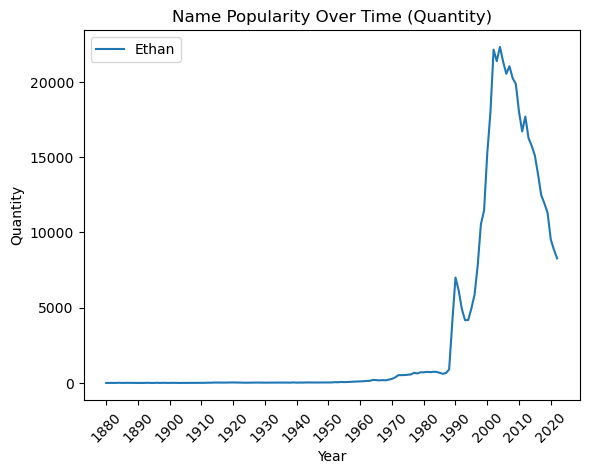

Total occurrences:  464045
Most popular year is 2004 with 22334 occurrences
Current rank for Ethan is 12 and highest is 3 in 2010
Current rank for Ethan is 8258 and highest is 1564 in 2004


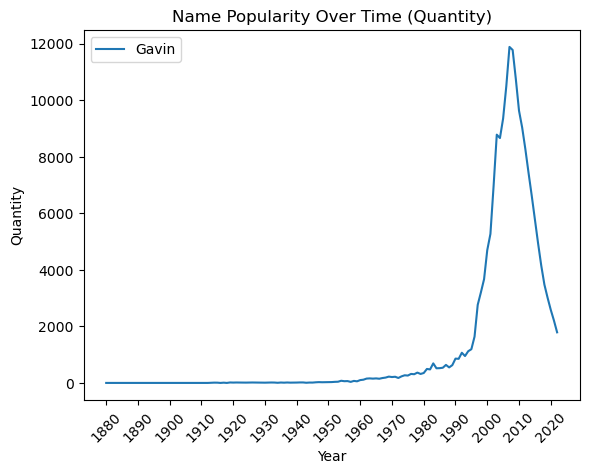

Total occurrences:  185580
Most popular year is 2007 with 11888 occurrences
Current rank for Gavin is 129 and highest is 31 in 2008
Current rank for Gavin is 16336 and highest is 2897 in 2004


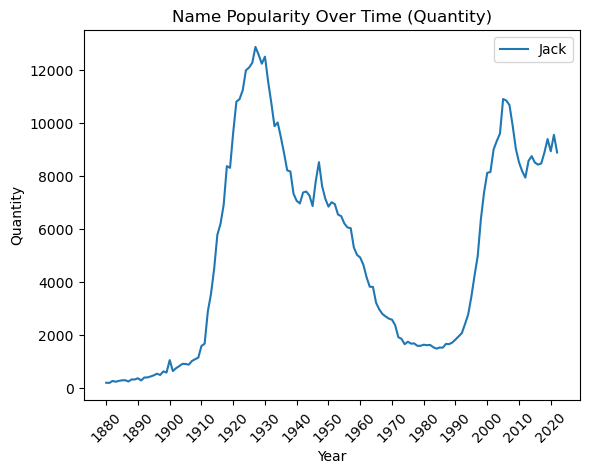

Total occurrences:  733579
Most popular year is 1927 with 12883 occurrences
Current rank for Jack is 20 and highest is 12 in 2021
Current rank for Jack is 7878 and highest is 723 in 1928


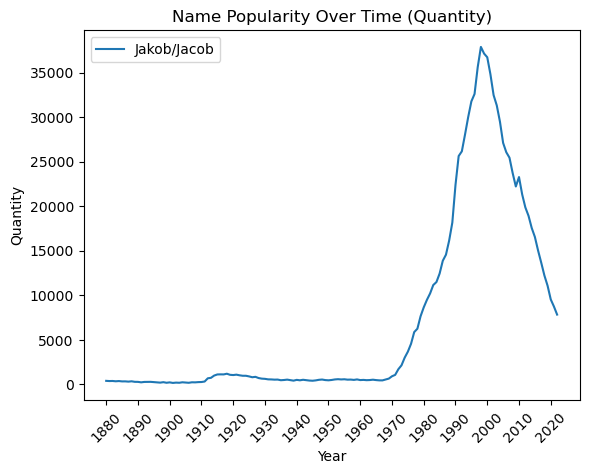

Total occurrences:  1001841
Most popular year is 1998 with 37870 occurrences
Current rank for Jakob is 760 and highest is 173 in 2001
Current rank for Jakob is Index([], dtype='int64') and highest is -1 in 0


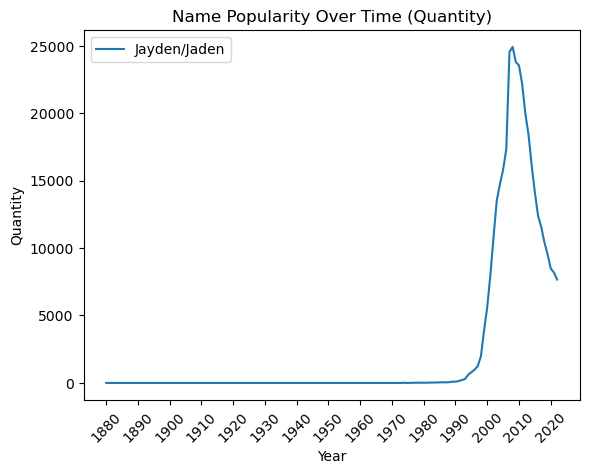

Total occurrences:  352496
Most popular year is 2008 with 24916 occurrences
Current rank for Jayden is 36 and highest is 5 in 2011
Current rank for Jayden is 1218 and highest is 172 in 2007


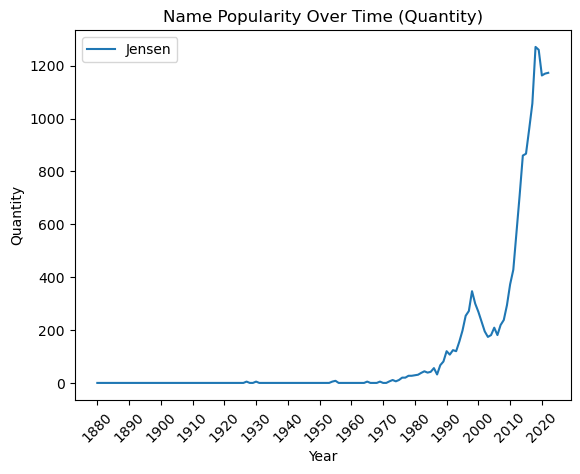

Total occurrences:  16672
Most popular year is 2018 with 1271 occurrences
Current rank for Jensen is 289 and highest is 289 in 2019
Current rank for Jensen is 2610 and highest is 988 in 1998


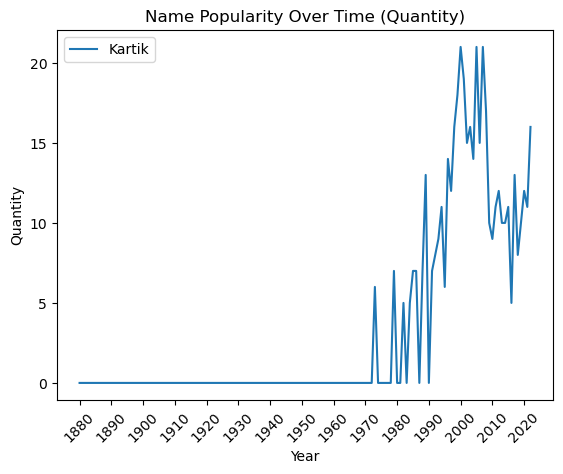

Total occurrences:  465
Most popular year is 2000 with 21 occurrences
Current rank for Kartik is 7922 and highest is 3854 in 2000
Current rank for Kartik is Index([], dtype='int64') and highest is -1 in 0


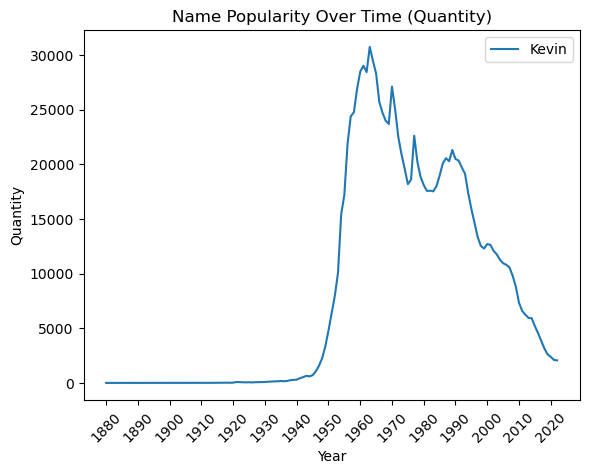

Total occurrences:  1184427
Most popular year is 1963 with 30735 occurrences
Current rank for Kevin is 150 and highest is 12 in 1963
Current rank for Kevin is Index([], dtype='int64') and highest is 911 in 1966


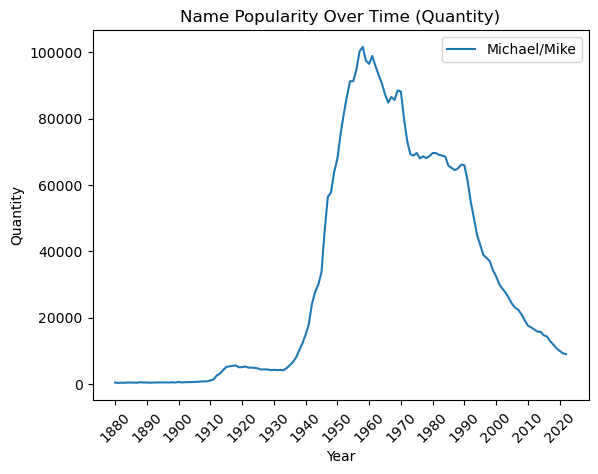

Total occurrences:  4629372
Most popular year is 1958 with 101663 occurrences
Current rank for Michael is 15 and highest is 2 in 1973
Current rank for Michael is 4313 and highest is 374 in 1975


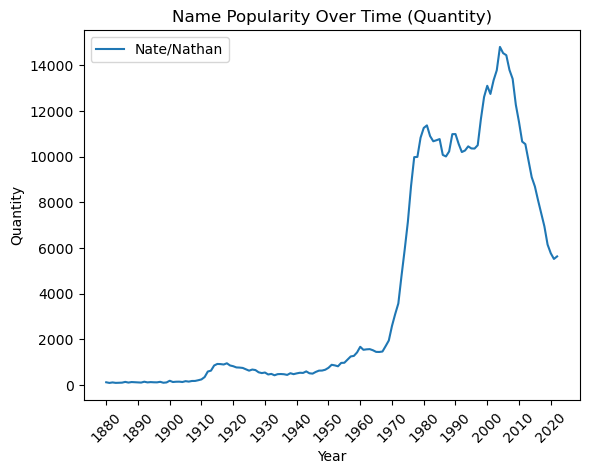

Total occurrences:  578556
Most popular year is 2004 with 14810 occurrences
Current rank for Nate is 1943 and highest is 1020 in 1880
Current rank for Nate is Index([], dtype='int64') and highest is 3575 in 1980


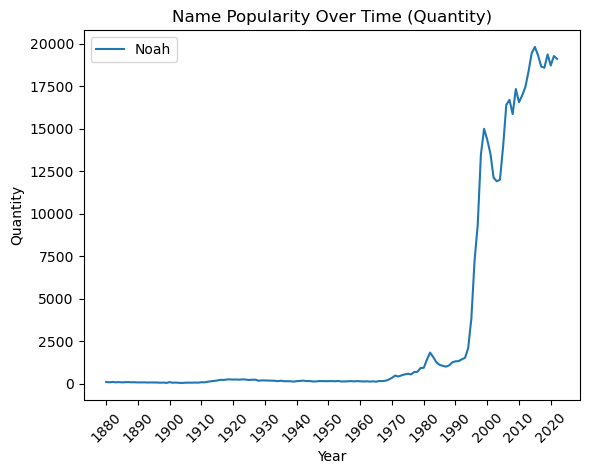

Total occurrences:  472734
Most popular year is 2015 with 19803 occurrences
Current rank for Noah is 3 and highest is 2 in 2014
Current rank for Noah is 1114 and highest is 618 in 2022


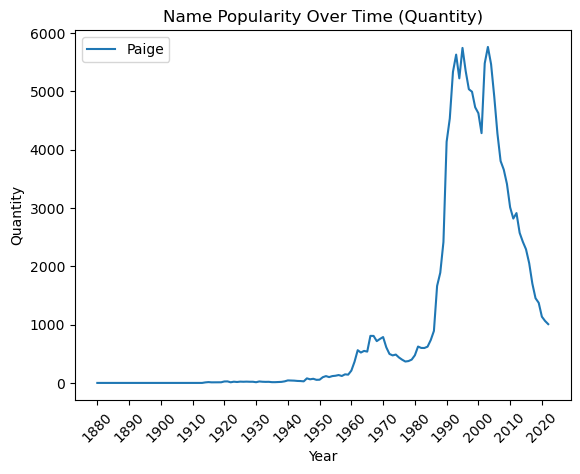

Total occurrences:  145477
Most popular year is 2003 with 5763 occurrences
Current rank for Paige is Index([], dtype='int64') and highest is 1597 in 1948
Current rank for Paige is 226 and highest is 47 in 2003


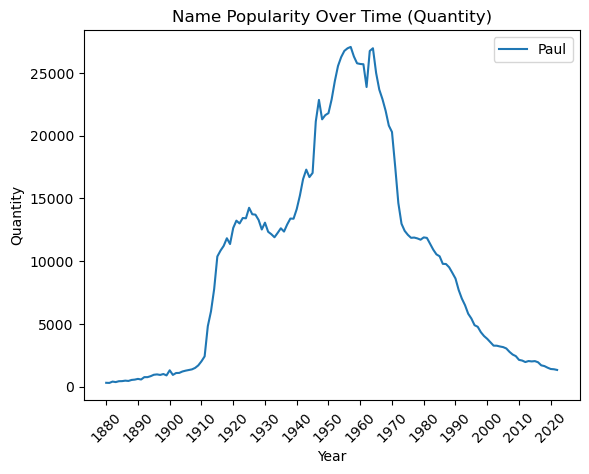

Total occurrences:  1400071
Most popular year is 1957 with 27080 occurrences
Current rank for Paul is 246 and highest is 13 in 1916
Current rank for Paul is Index([], dtype='int64') and highest is 637 in 1928


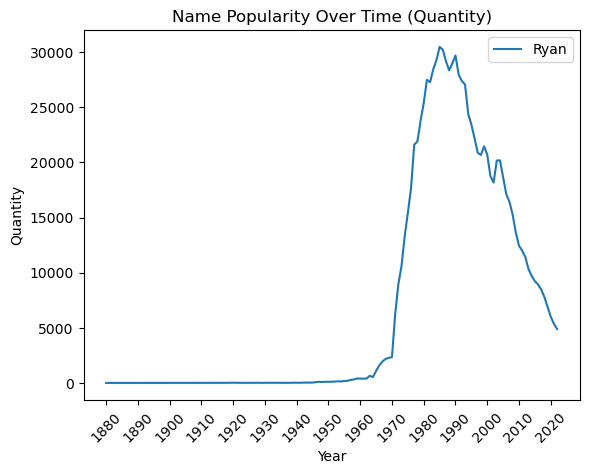

Total occurrences:  978980
Most popular year is 1985 with 30483 occurrences
Current rank for Ryan is 55 and highest is 12 in 1991
Current rank for Ryan is 400 and highest is 342 in 1986


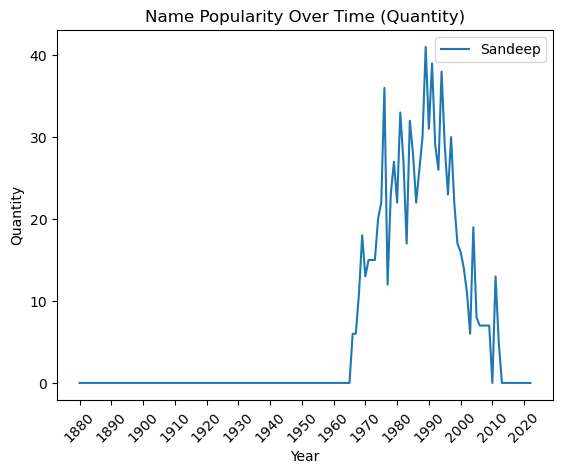

Total occurrences:  921
Most popular year is 1989 with 41 occurrences
Current rank for Sandeep is Index([], dtype='int64') and highest is 1702 in 1976
Current rank for Sandeep is Index([], dtype='int64') and highest is 7209 in 1990


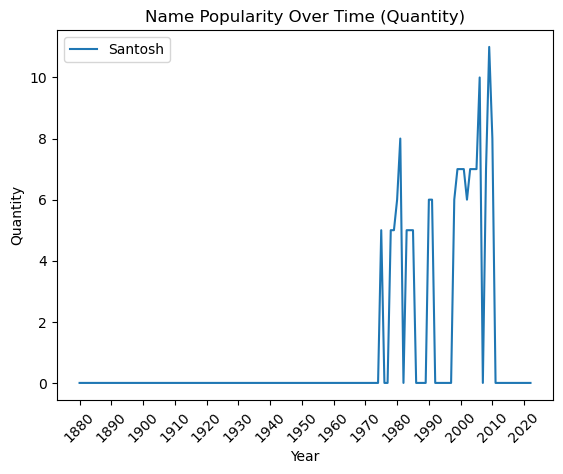

Total occurrences:  146
Most popular year is 2009 with 11 occurrences
Current rank for Santosh is Index([], dtype='int64') and highest is 4885 in 1981
Current rank for Santosh is Index([], dtype='int64') and highest is -1 in 0


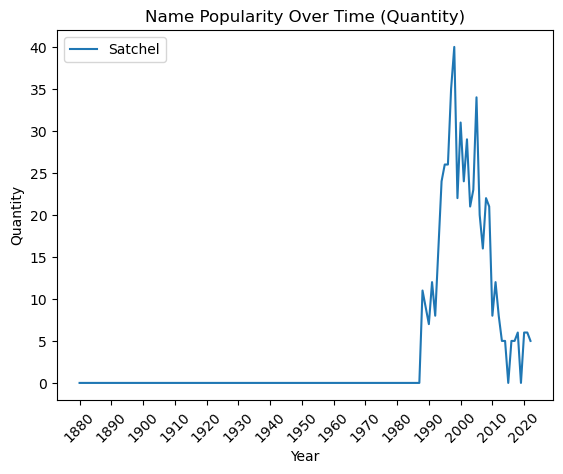

Total occurrences:  548
Most popular year is 1998 with 40 occurrences
Current rank for Satchel is Index([], dtype='int64') and highest is 2266 in 1998
Current rank for Satchel is Index([], dtype='int64') and highest is -1 in 0


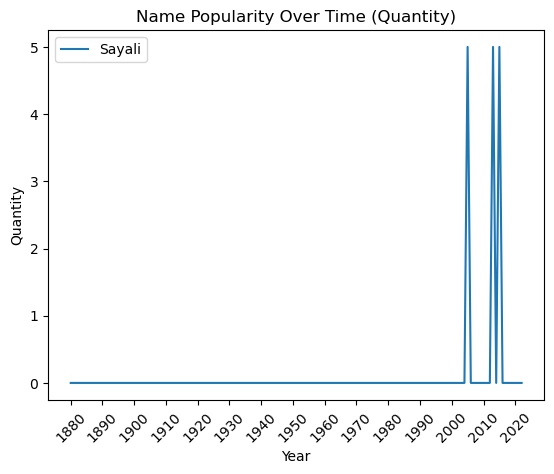

Total occurrences:  15
Most popular year is 2005 with 5 occurrences
Current rank for Sayali is Index([], dtype='int64') and highest is -1 in 0
Current rank for Sayali is Index([], dtype='int64') and highest is 18661 in 2005


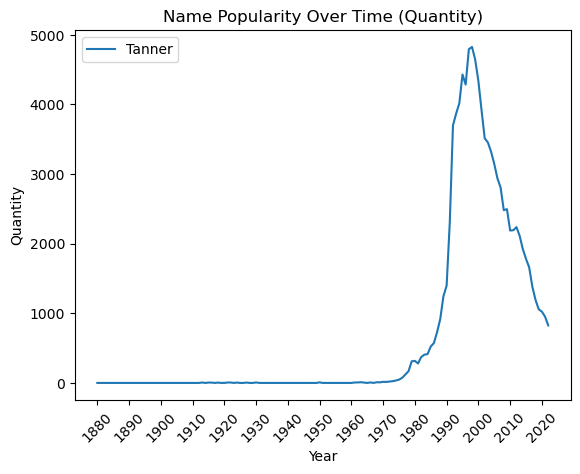

Total occurrences:  97922
Most popular year is 1998 with 4826 occurrences
Current rank for Tanner is 330 and highest is 83 in 1998
Current rank for Tanner is 3544 and highest is 1404 in 1998


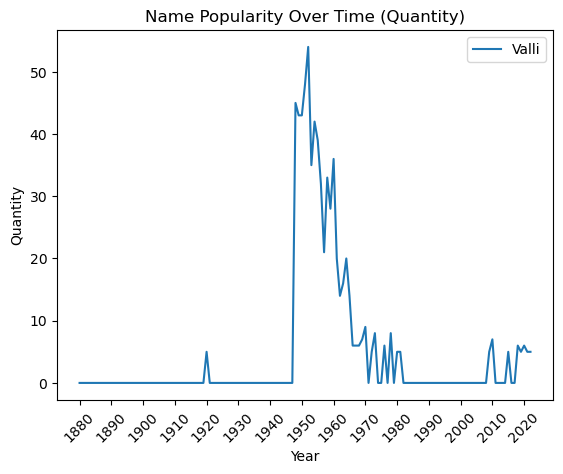

Total occurrences:  703
Most popular year is 1952 with 54 occurrences
Current rank for Valli is Index([], dtype='int64') and highest is -1 in 0
Current rank for Valli is 17782 and highest is 1314 in 1952


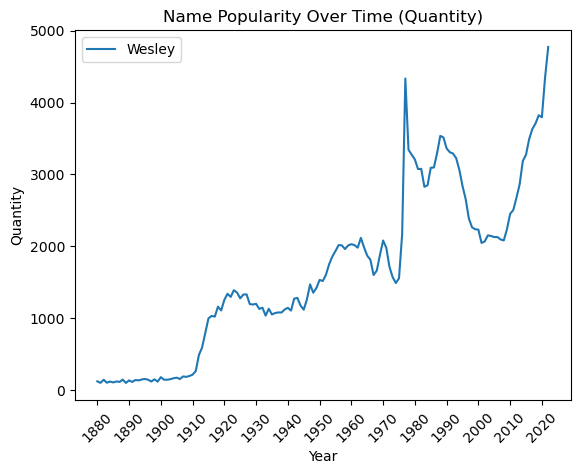

Total occurrences:  235322
Most popular year is 2022 with 4773 occurrences
Current rank for Wesley is 100 and highest is 67 in 1977
Current rank for Wesley is 2676 and highest is 1529 in 1890


In [28]:
classTotals = {}
for studentName in classNames:
    names_to_plot = studentName.split('/')
    popularity = {}
    occur = 0
    maxYear = 0
    maxVal = 0
    for year in years:
        cnt = 0
        for name in names_to_plot:
            cnt += dataframes[year][dataframes[year]['name'] == name]['quantity'].sum()
        popularity[year] = cnt
        occur += cnt
        if cnt > maxVal:
            maxVal = cnt
            maxYear = year
    plt.plot(list(popularity.keys()), list(popularity.values()), label=studentName)
    plt.xlabel('Year')
    plt.ylabel('Quantity')
    plt.xticks(np.arange(0, 150, 10),np.arange(1880, 2021, 10), rotation = 45)

    plt.title('Name Popularity Over Time (Quantity)')
    plt.legend()
    plt.show()
    
    # total occurences in 150 years in the US
    print('Total occurrences: ', occur)
    
    classTotals[studentName] = occur
    
    # highest year for your name
    print(f'Most popular year is {maxYear} with {maxVal} occurrences')
    
    analyze_rank_m(names_to_plot[0])
    analyze_rank_f(names_to_plot[0])


In [29]:
male_dataframes['1880'].head(10)

,name,gender,quantity
0,John,M,9655
1,William,M,9532
2,James,M,5927
3,Charles,M,5348
4,George,M,5126
5,Frank,M,3242
6,Joseph,M,2632
7,Thomas,M,2534
8,Henry,M,2444
9,Robert,M,2415


In [30]:
male_dataframes['2022'].head(10)

,name,gender,quantity
0,Liam,M,20456
1,Noah,M,18621
2,Oliver,M,15076
3,James,M,12028
4,Elijah,M,11979
5,William,M,11282
6,Henry,M,11221
7,Lucas,M,10909
8,Benjamin,M,10842
9,Theodore,M,10754


In [31]:
female_dataframes['1880'].head(10)

,name,gender,quantity
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [32]:
female_dataframes['2022'].head(10)

,name,gender,quantity
0,Olivia,F,16573
1,Emma,F,14435
2,Charlotte,F,12891
3,Amelia,F,12333
4,Sophia,F,12310
5,Isabella,F,11662
6,Ava,F,11039
7,Mia,F,11018
8,Evelyn,F,9289
9,Luna,F,8922


In [33]:
# Most popular names all time

In [34]:
# Trendiest names of the past

Total occurrences of Malcolm:  66821
Total occurrences of Forrest:  52244
Total occurrences of Truman:  15654
Total occurrences of Danny:  286911
Total occurrences of James:  5238523


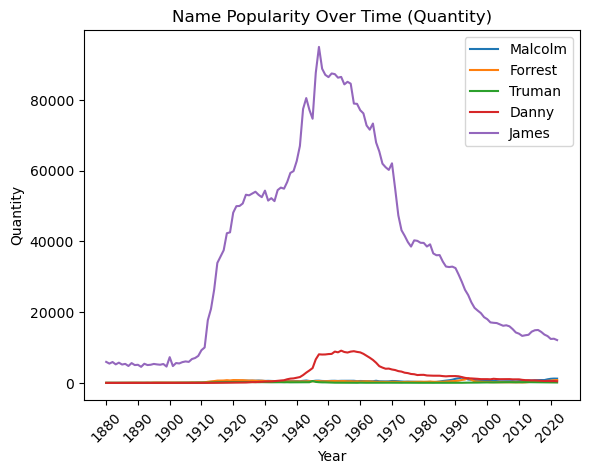

Total occurrences of Sweden:  73
Total occurrences of Sasha:  38714
Total occurrences of Ruby:  369095
Total occurrences of Isla:  41430
Total occurrences of Mary:  4149886


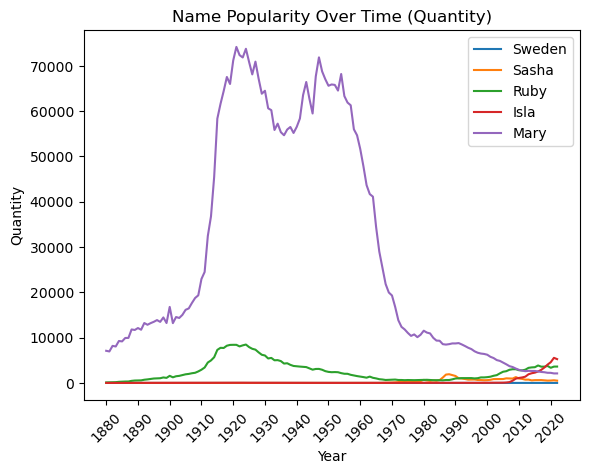

Total occurrences of Irvine:  904


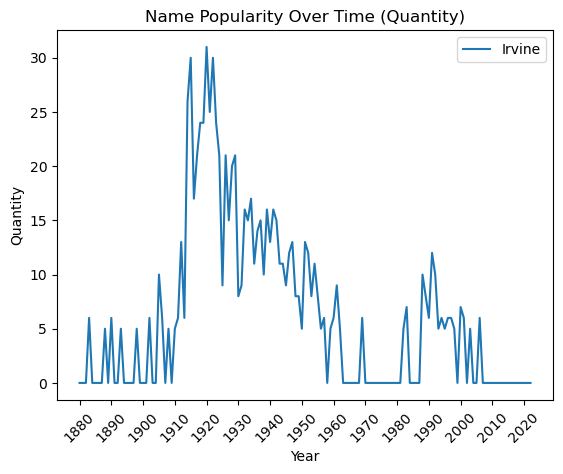

In [46]:
# Mine and Darbi's Favorite Names
fav_names_boys = ['Malcolm', 'Forrest', 'Truman', 'Danny', 'James']
fav_names_girls = ['Sweden', 'Sasha', 'Ruby', 'Isla', 'Mary']

plot_names(fav_names_boys)
# plot_by_rank_m(fav_names_boys)
plot_names(fav_names_girls)
plot_names(['Irvine'])

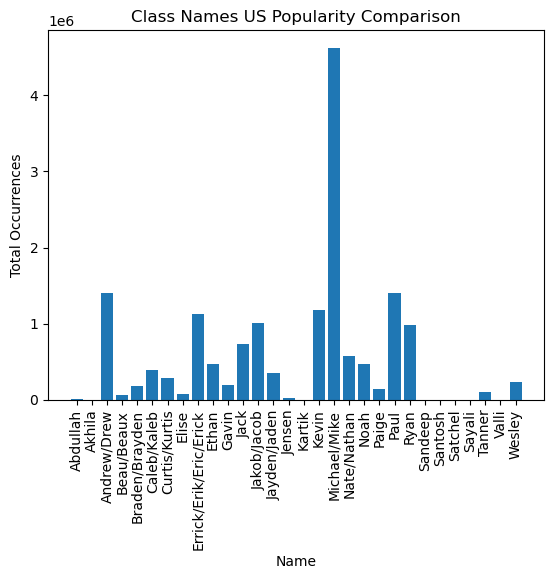

30

In [45]:
# bar chart to compare class totals
# Extract keys and values from the dictionary
categories = list(classTotals.keys())
values = list(classTotals.values())

# Create the bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Total Occurrences')
plt.title('Class Names US Popularity Comparison')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [37]:
for name in fav_names_girls:
    analyze_rank_f(name)

for name in fav_names_boys:
    analyze_rank_m(name)

Current rank for Sweden is 17657 and highest is 9855 in 2017
Current rank for Sasha is 627 and highest is 147 in 1988
Current rank for Ruby is 66 and highest is 22 in 1911
Current rank for Isla is 57 and highest is 33 in 2021
Current rank for Mary is 126 and highest is 1 in 1938
Current rank for Malcolm is 327 and highest is 206 in 1928
Current rank for Forrest is 493 and highest is 174 in 1913
Current rank for Truman is 1243 and highest is 249 in 1945
Current rank for Danny is 523 and highest is 40 in 1948
Current rank for James is 7 and highest is 2 in 1949


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


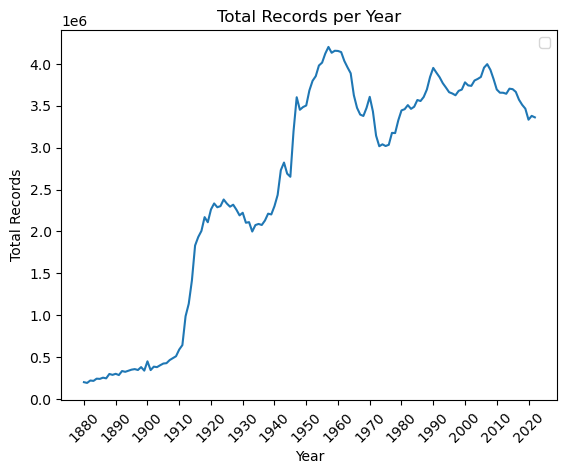

In [38]:
# total names per year

popularity = {year: dataframes[year]['quantity'].sum() for year in years}
plt.plot(list(popularity.keys()), list(popularity.values()))
plt.xlabel('Year')
plt.ylabel('Total Records')
plt.xticks(np.arange(0, 150, 10),np.arange(1880, 2021, 10), rotation = 45)

plt.title('Total Records per Year')
plt.legend()
plt.show()

Total occurrences of Blake for males:  182730
Total occurrences of Blake for females:  16204


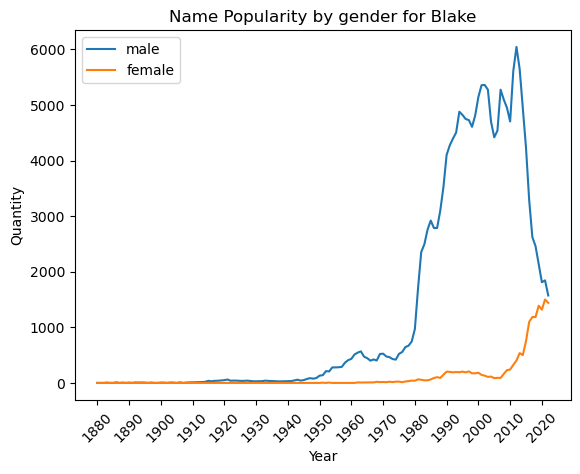

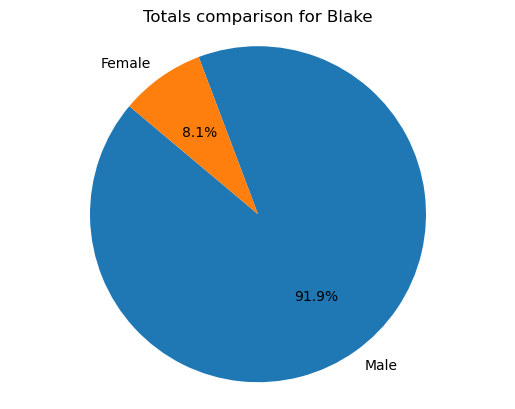

Total occurrences of Leslie for males:  112875
Total occurrences of Leslie for females:  269078


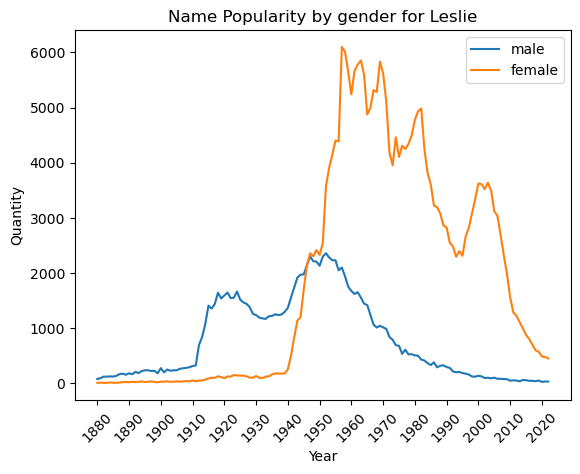

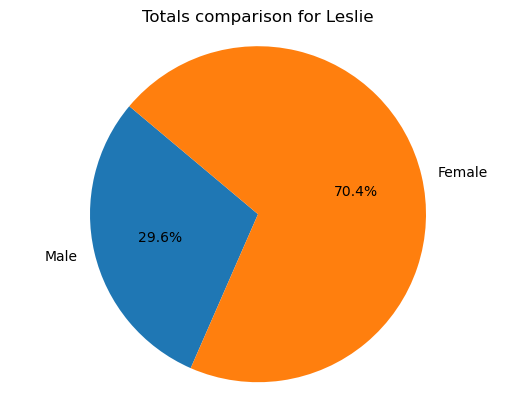

Total occurrences of Casey for males:  113429
Total occurrences of Casey for females:  77386


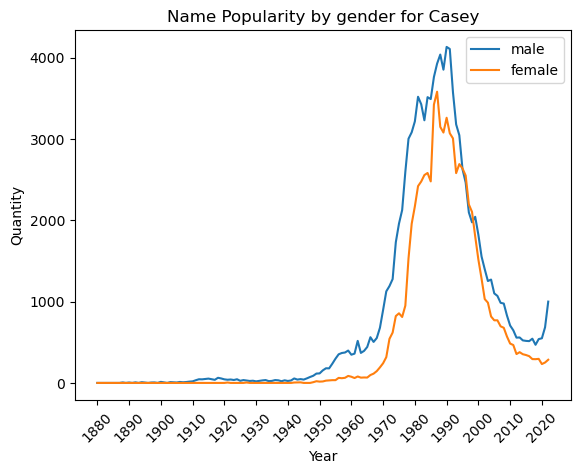

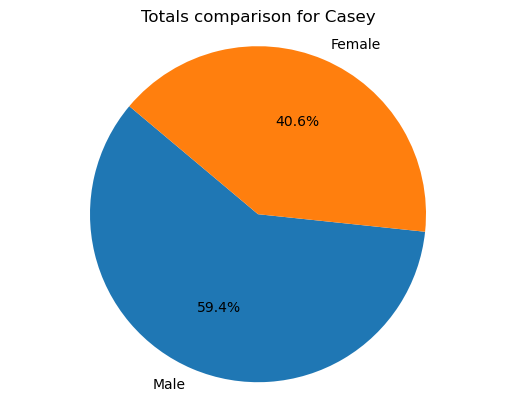

Total occurrences of Drew for males:  76934
Total occurrences of Drew for females:  8317


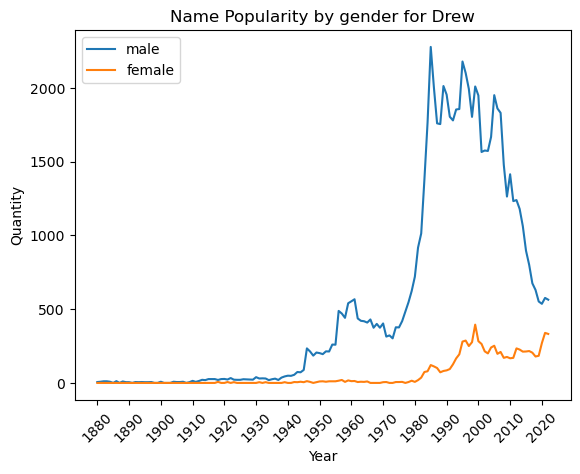

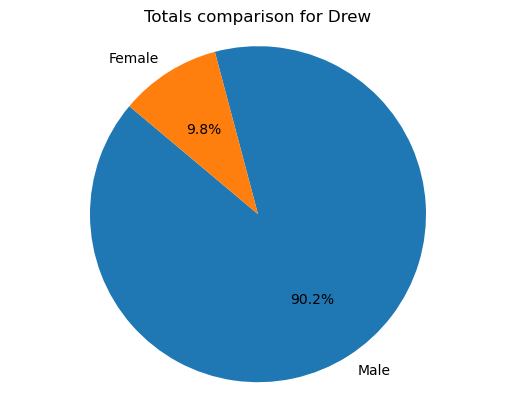

Total occurrences of Riley for males:  100108
Total occurrences of Riley for females:  128118


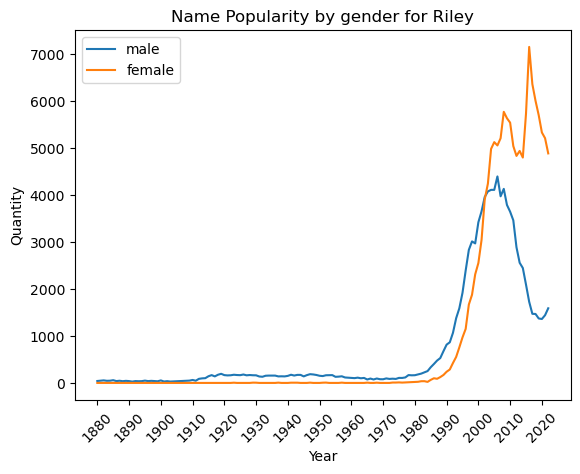

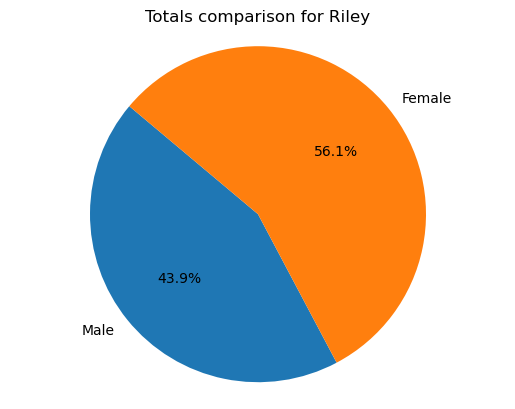

Total occurrences of Robin for males:  45922
Total occurrences of Robin for females:  290835


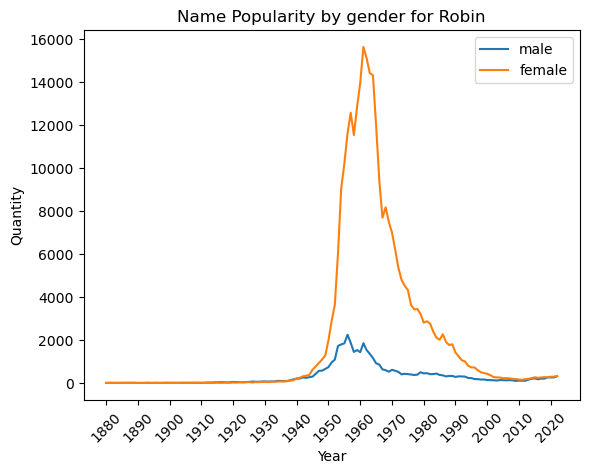

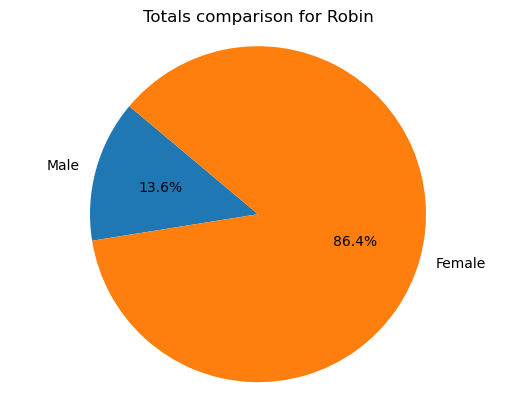

Total occurrences of Taylor for males:  112220
Total occurrences of Taylor for females:  327230


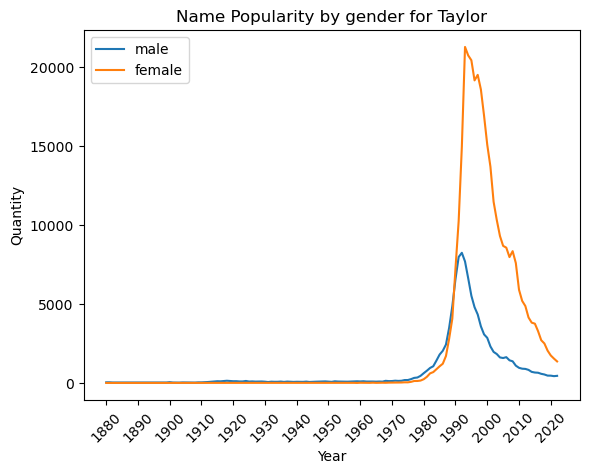

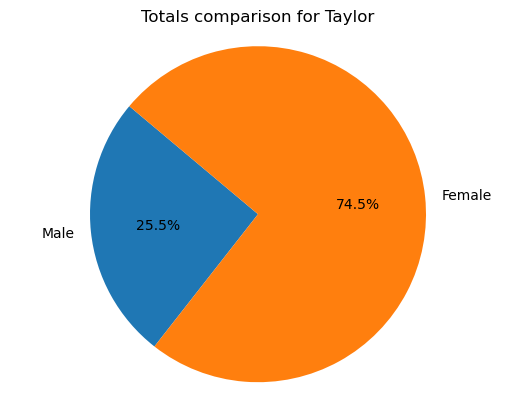

Total occurrences of Jessie for males:  110898
Total occurrences of Jessie for females:  168986


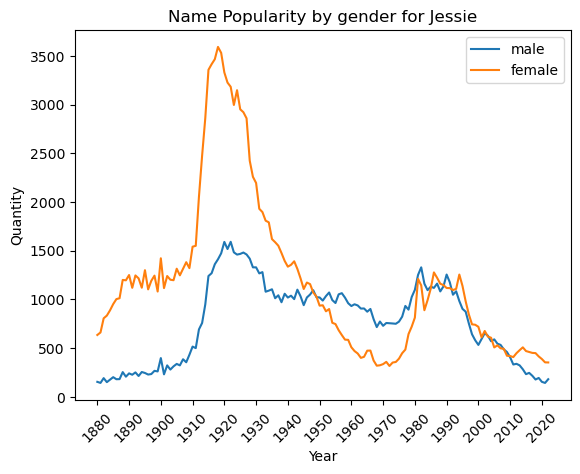

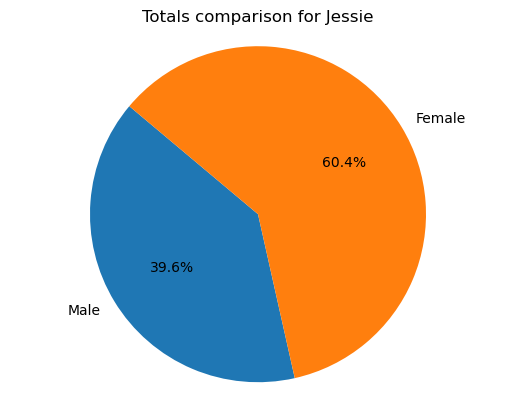

Total occurrences of Quinn for males:  35011
Total occurrences of Quinn for females:  44282


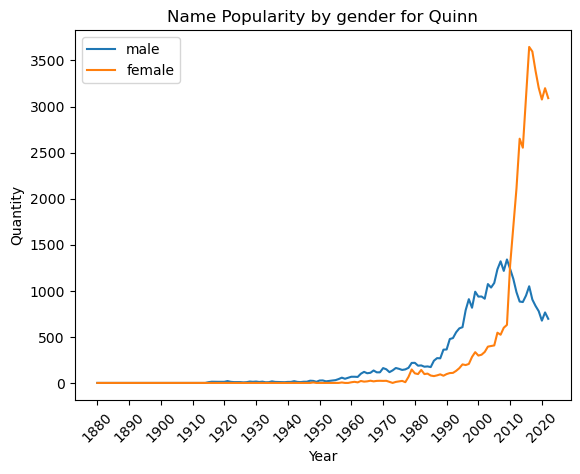

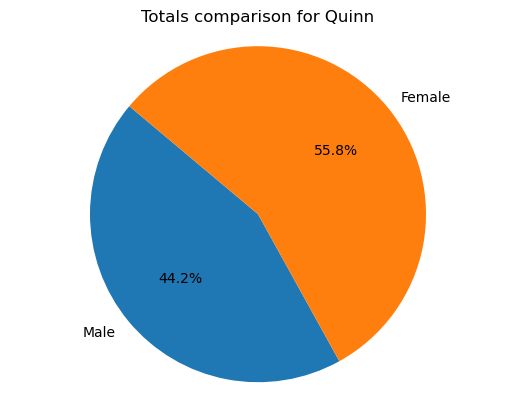

In [39]:
# gender neutral names
names_n = ["Blake",
"Leslie",
"Casey",
"Drew",
"Riley",
"Robin",
"Taylor",
"Jessie",
"Quinn"]

for name in names_n:
    sizes = []
    popularity = {year: male_dataframes[year][male_dataframes[year]['name'] == name]['quantity'].sum() for year in years}
    plt.plot(list(popularity.keys()), list(popularity.values()), label='male')
    print(f'Total occurrences of {name} for males: ', sum(popularity.values()))
    sizes.append(sum(popularity.values()))
    popularity = {year: female_dataframes[year][female_dataframes[year]['name'] == name]['quantity'].sum() for year in years}
    plt.plot(list(popularity.keys()), list(popularity.values()), label='female')
    print(f'Total occurrences of {name} for females: ', sum(popularity.values()))
    sizes.append(sum(popularity.values()))
    plt.xlabel('Year')
    plt.ylabel('Quantity')
    plt.xticks(np.arange(0, 150, 10),np.arange(1880, 2021, 10), rotation = 45)

    plt.title(f'Name Popularity by gender for {name}')
    plt.legend()
    plt.show()
    
    
    
    labels = ['Male', 'Female']  # Labels for the slices

    # Create the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

    # Add a title
    plt.title(f'Totals comparison for {name}')

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Show the plot
    plt.show()

In [44]:
analyze_rank_m('Calvin')

Current rank for Calvin is 145 and highest is 45 in 1924
